# Clear Lake Reservoir LST Temperature Analysis

This notebook borrows heavily from Steven Pestana's 'hypothesis testing' notebook presented at WHW 2020.

In [3]:
import numpy as np
import pandas as pd

# scipy statistics package
import scipy.stats as st

# for plotting
import matplotlib.pyplot as plt
# tell jupyter to show our plots in the notebook here
%matplotlib inline

In [4]:
# Filepath to our excel file.
clear_LST_day_fp = 'GEEcode/GEEout/temp_stats_dayLST_clear_v2.csv'
clear_LST_night_fp = 'GEEcode/GEEout/temp_stats_nightLST_clear_v2.csv'

# Use pandas.read_excel() function to open this file.
clear_LST_day = pd.read_csv(clear_LST_day_fp)
clear_LST_night = pd.read_csv(clear_LST_night_fp)

# Now we can see the dataset we loaded:
clear_LST_day.head(3);
clear_LST_night.head(3)

,system:index,LST_Night_1km_max,LST_Night_1km_median,LST_Night_1km_min,LST_Night_1km_stdDev,modis_time,pixel_count,.geo
0,2008_01_01,-5.67,-7.17,-9.95,0.986947,1199145600000,33,NaN
1,2008_01_02,NaN,NaN,NaN,NaN,1199232000000,0,NaN
2,2008_01_03,NaN,NaN,NaN,NaN,1199318400000,0,NaN


In [5]:
clear_LST_day['datetime'] = pd.to_datetime(clear_LST_day['system:index'], format = '%Y_%m_%d')
clear_LST_day.head(3)

clear_LST_night['datetime'] = pd.to_datetime(clear_LST_night['system:index'], format = '%Y_%m_%d')
clear_LST_night.head(3)

,system:index,LST_Night_1km_max,LST_Night_1km_median,LST_Night_1km_min,LST_Night_1km_stdDev,modis_time,pixel_count,.geo,datetime
0,2008_01_01,-5.67,-7.17,-9.95,0.986947,1199145600000,33,NaN,2008-01-01
1,2008_01_02,NaN,NaN,NaN,NaN,1199232000000,0,NaN,2008-01-02
2,2008_01_03,NaN,NaN,NaN,NaN,1199318400000,0,NaN,2008-01-03


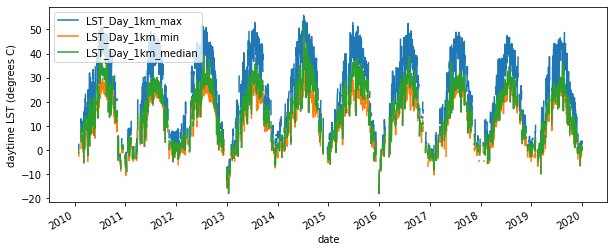

In [6]:
# Plot day temperature over datetime
fig, ax = plt.subplots(figsize=(10,4))

clear_LST_day.plot(x='datetime', y='LST_Day_1km_max', ax=ax)
clear_LST_day.plot(x='datetime', y='LST_Day_1km_min', ax=ax)
clear_LST_day.plot(x='datetime', y='LST_Day_1km_median', ax=ax)

ax.set_ylabel('daytime LST (degrees C)');

ax.set_xlabel('date');

In [7]:
#filter out days with less tan 75% observations
obs_cutoff = max(clear_LST_day['pixel_count'])*0.75

clear_LST_day_filt = clear_LST_day[ clear_LST_day['pixel_count'] >= obs_cutoff ]

clear_LST_day_filt.head(5)

,system:index,LST_Day_1km_max,LST_Day_1km_median,LST_Day_1km_min,LST_Day_1km_stdDev,modis_time,pixel_count,.geo,datetime
13,2010_01_14,3.59,2.12,0.97,0.623873,1263427200000,40,NaN,2010-01-14
33,2010_02_03,4.75,2.13,0.83,1.188120,1265155200000,30,NaN,2010-02-03
39,2010_02_09,9.07,3.65,2.13,1.975312,1265673600000,32,NaN,2010-02-09
45,2010_02_15,7.21,3.73,0.73,1.670218,1266192000000,39,NaN,2010-02-15
46,2010_02_16,12.99,7.31,4.49,2.293101,1266278400000,40,NaN,2010-02-16


In [10]:
#do the same for night time LST
obs_cutoff_night = max(clear_LST_night['pixel_count'])*0.75

clear_LST_night_filt = clear_LST_night[ clear_LST_night['pixel_count'] >= obs_cutoff_night ]

clear_LST_night_filt.head(5)

,system:index,LST_Night_1km_max,LST_Night_1km_median,LST_Night_1km_min,LST_Night_1km_stdDev,modis_time,pixel_count,.geo,datetime
0,2008_01_01,-5.67,-7.17,-9.95,0.986947,1199145600000,33,NaN,2008-01-01
8,2008_01_09,-4.07,-4.64,-7.13,0.654602,1199836800000,40,NaN,2008-01-09
10,2008_01_11,-2.79,-3.72,-5.49,0.694423,1200009600000,38,NaN,2008-01-11
18,2008_01_19,-8.17,-9.31,-13.43,0.924438,1200700800000,34,NaN,2008-01-19
19,2008_01_20,-4.19,-6.27,-10.37,1.331829,1200787200000,40,NaN,2008-01-20


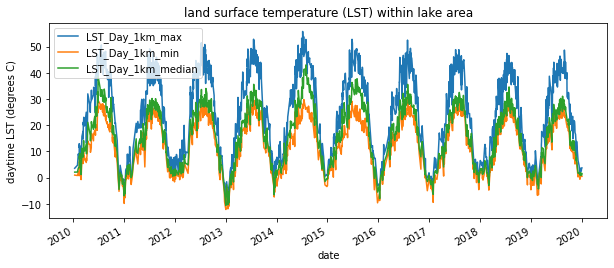

In [11]:
# Plot temperature over system:index
fig, ax = plt.subplots(figsize=(10,4))

clear_LST_day_filt.plot(x='datetime', y='LST_Day_1km_max', ax=ax)
clear_LST_day_filt.plot(x='datetime', y='LST_Day_1km_min', ax=ax)
clear_LST_day_filt.plot(x='datetime', y='LST_Day_1km_median', ax=ax)

ax.set_ylabel('daytime LST (degrees C)');

ax.set_xlabel('date');

ax.set_title('land surface temperature (LST) within lake area');

plt.savefig('GEEcode/GEEout/LST_temp_bgs.png')


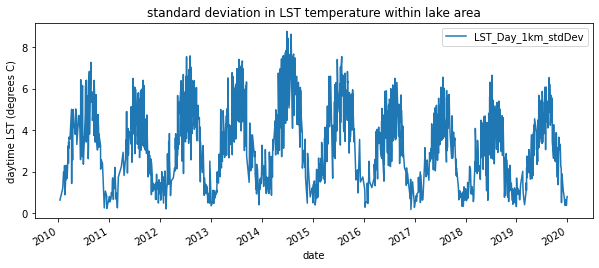

In [9]:

fig, ax=plt.subplots(figsize=(10,4))

clear_LST_day_filt.plot(x='datetime', y='LST_Day_1km_stdDev', ax = ax)

ax.set_ylabel('daytime LST (degrees C)');

ax.set_xlabel('date');

ax.set_title('standard deviation in LST temperature within lake area');

plt.savefig('GEEcode/GEEout/LST_stdev_bgs.png')

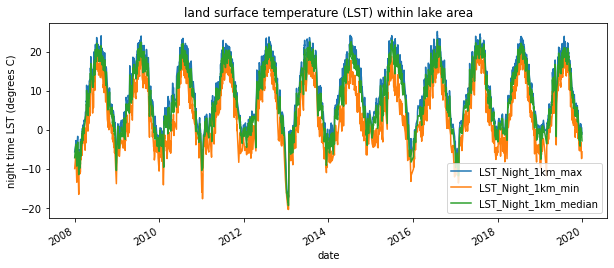

In [12]:
#plot for night time temp, too
fig, ax = plt.subplots(figsize=(10,4))

clear_LST_night_filt.plot(x='datetime', y='LST_Night_1km_max', ax=ax)
clear_LST_night_filt.plot(x='datetime', y='LST_Night_1km_min', ax=ax)
clear_LST_night_filt.plot(x='datetime', y='LST_Night_1km_median', ax=ax)

ax.set_ylabel('night time LST (degrees C)');

ax.set_xlabel('date');

ax.set_title('night time land surface temperature (LST) within lake area');

plt.savefig('GEEcode/GEEout/LST_temp_night_bgs.png')


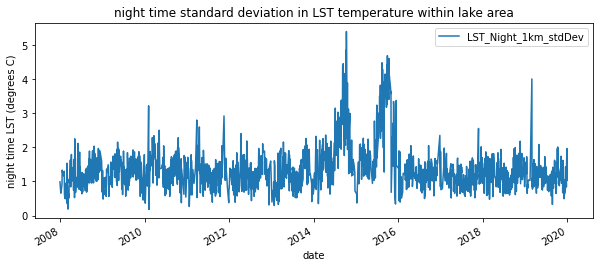

In [13]:
fig, ax=plt.subplots(figsize=(10,4))

clear_LST_night_filt.plot(x='datetime', y='LST_Night_1km_stdDev', ax = ax)

ax.set_ylabel('night time LST (degrees C)');

ax.set_xlabel('date');

ax.set_title('night time standard deviation in LST temperature within lake area');

plt.savefig('GEEcode/GEEout/LST_stdev_night_bgs.png')